<a href="https://colab.research.google.com/github/lauraveul1995/Assignments/blob/main/winc_assignment_sharkattack_finished.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Setting up**

In [41]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd
%load_ext google.colab.data_table

The google.colab.data_table extension is already loaded. To reload it, use:
  %reload_ext google.colab.data_table


In [42]:
df = pd.read_csv("https://raw.githubusercontent.com/lauraveul1995/Data/main/attacks.csv", encoding = "ISO-8859-1")
column_list = list(df.columns)

Columns in file:
['Case Number', 'Date', 'Year', 'Type', 'Country', 'Area', 'Location', 'Activity', 'Name', 'Sex ', 'Age', 'Injury', 'Fatal (Y/N)', 'Time',
'Species ', 'Investigator or Source', 'pdf', 'href formula', 'href', 'Case Number.1', 'Case Number.2', 'original order', 'Unnamed: 22', 'Unnamed: 23']

# **Data cleaning, preparation, making figures**

## All

In [36]:
df2 = df[["Type", "Activity", "Age", "Fatal (Y/N)","Species "]] # select relevant columns
df2.columns = ["type","act","age","fatal","species"] # easier accessable column names
df2 = df2.dropna(how="all") # drop all cases without any information
df2[["type","act","fatal","species","age"]] = df2[["type","act","fatal","species","age"]].apply(lambda x: x.str.lower()) # all strings to lowercase to make life easier

# ALL
df2 = df2.drop(df2.loc[df2["species"].str.contains("shark involvement", na=False)].index) # drop all cases in which there was no confirmed shark involvement
df2 = df2.drop(df2.loc[df2["species"].str.contains("questionable incident", na=False)].index) # drop all cases in which there was no confirmed shark involvement

<ipython-input-36-0cdb20ed95a7>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2[["type","act","fatal","species","age"]] = df2[["type","act","fatal","species","age"]].apply(lambda x: x.str.lower()) # all strings to lowercase to make life easier


## Fatality

In [43]:
# FATAL
df2["fatal"].loc[df2["fatal"].isna()] = None
df2["fatal"] = df2["fatal"].str.strip() # stripping whitespace
df2["fatal"].loc[~((df2["fatal"].str.match("y")) | (df2["fatal"].str.match("n")))] = None # setting all instances besides y and n to NA

## Type

In [39]:
# TYPE
df2["type"].loc[df2["type"].isna()] = None
# df2["type"].loc[~((df2["type"].str.contains("unprovoked")) | (df2["type"].str.contains("provoked")))] = None # setting all instances besides unprovoked and provoked to NA

In [6]:
# results
type = df2.loc[df2[["type", "fatal"]].isna().sum(axis=1)==0] # selecting non-missing
# type["type"].value_counts()
counts_pct = pd.DataFrame(type.groupby("type")["fatal"].value_counts(normalize=True).mul(100).round())
counts_pct.columns = ["pct"]
counts_pct = counts_pct.reset_index()
nonfatal = list(counts_pct["pct"].loc[counts_pct["fatal"]=="n"])
fatal = list(counts_pct["pct"].loc[counts_pct["fatal"]=="y"])

Text(0.0, 1.0, 'Fatality per type of incident')

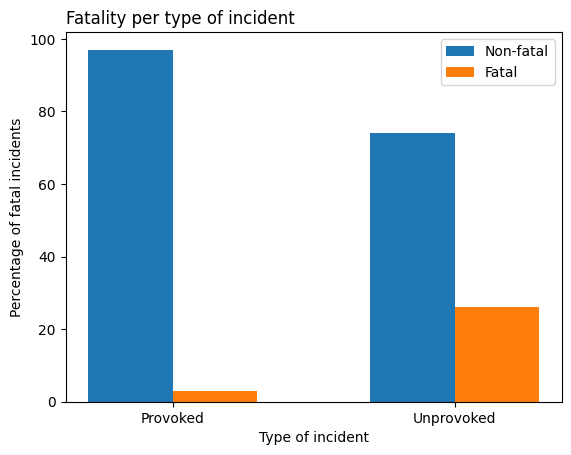

In [7]:
# figure
fig, ax = plt.subplots(1, 1)
ax.set_xlabel('Type of incident')
ax.set_ylabel('Percentage of fatal incidents')
ax.bar(np.arange(2), nonfatal, width=0.3, align='center')
ax.bar(np.arange(2)+0.3, fatal, width=0.3, align='center')
ax.set_xticks(np.arange(2)+0.15)
ax.set_xticklabels( ('Provoked', 'Unprovoked') )
ax.legend(labels=("Non-fatal","Fatal"))
ax.set_title("Fatality per type of incident", loc="left")


## Age

In [31]:
# AGE
df3 = df2.copy()
df3["age"].loc[df3["age"].isna()] = np.nan

# text and non-specific ages
df3["age"].loc[df3["age"].str.contains("teen", na=False)] = np.linspace(13,18,len(df3["age"].loc[df3["age"].str.contains("teen", na=False)])).astype(int) # replacing teen by a spaced out range of teen ages
df3["age"].loc[df3["age"].str.contains("^\D*$", na=False)] = np.nan # all remaining non-specific text ages to NA
df3["age"].loc[df3["age"].str.contains(r'20[\'*s]', na=False)] = np.linspace(20,29,len(df3["age"].loc[df3["age"].str.contains(r'20[\'*s]', na=False)])) # replacing 20s by a spaced out range of 20s ages
df3["age"].loc[df3["age"].str.contains(r'30[\'*s]', na=False)] = np.linspace(30,39,len(df3["age"].loc[df3["age"].str.contains(r'30[\'*s]', na=False)])) # replacing 30s by a spaced out range of 30s ages
df3["age"].loc[df3["age"].str.contains(r'40[\'*s]', na=False)] = np.linspace(40,49,len(df3["age"].loc[df3["age"].str.contains(r'40[\'*s]', na=False)])) # replacing 40s by a spaced out range of 40s ages
df3["age"].loc[df3["age"].str.contains(r'50[\'*s]', na=False)] = np.linspace(50,59,len(df3["age"].loc[df3["age"].str.contains(r'50[\'*s]', na=False)])) # replacing 50s by a spaced out range of 30s ages
df3["age"].loc[df3["age"].str.contains(r'60[\'*s]', na=False)] = np.linspace(60,69,len(df3["age"].loc[df3["age"].str.contains(r'60[\'*s]', na=False)])) # replacing 60s by a spaced out range of 30s ages

df3["age"] = df3["age"].str.replace("18 months","1") # months to years
df3["age"] = df3["age"].str.replace("9 months","0") # months to years
df3["age"] = df3["age"].str.replace("2 to 3 months","0") # months to years

# uncertain ages
df3["age"].loc[df3["age"].str.contains("or", na=False)] = ((df3["age"].loc[df3["age"].str.contains("or", na=False)].str.split("or", expand=True)[0].astype(int) +
                                                           df3["age"].loc[df3["age"].str.contains("or", na=False)].str.split("or", expand=True)[1].astype(int))/2).round() # taking mean age for instance with "or"
df3["age"].loc[df3["age"].str.contains("to", na=False)] = ((df3["age"].loc[df3["age"].str.contains("to", na=False)].str.split("to", expand=True)[0].astype(int) +
                                                            df3["age"].loc[df3["age"].str.contains("to", na=False)].str.split("to", expand=True)[1].astype(int))/2).round() # taking mean age for instance with "to"

# fixing some whitespace
df3["age"]= df3["age"].str.strip() # stripping whitespace
df3["age"] = df3["age"].str.replace(r"[\s]{2,}"," ") # changing multiple whitespaces to 1 whitespace

# multiple people with different ages
df3["age"].loc[df3["age"].str.contains("both 11", na=False)] = "11 & 11" # "both 11" to "11 & 11"
df3["age"].loc[df3["age"].str.contains("[[0-9\?]+\W+[0-9\?]+", na=False)] = df3["age"].loc[df3["age"].str.contains("[[0-9\?]+\W+[0-9\?]+", na=False)].str.split(" & |, ") # split ages on , &
df4 = df3.explode("age") # new df with row for each age

# last fixes
df4["age"] = df4["age"].str.replace("½","") # removing ½
df4["age"] = df4["age"].str.replace("20\?","20")
df4["age"] = df4["age"].str.replace("\>50","55")
df4["age"].loc[df4["age"].str.contains("\W", na=False)] = np.nan # setting ages that still have a non-digit to NA

ages = df4["age"].loc[~df4["age"].isna()].astype(int)

<ipython-input-31-b16dad0ed642>:26: FutureWarning: The default value of regex will change from True to False in a future version.
  df3["age"] = df3["age"].str.replace(r"[\s]{2,}"," ") # changing multiple whitespaces to 1 whitespace
<ipython-input-31-b16dad0ed642>:35: FutureWarning: The default value of regex will change from True to False in a future version.
  df4["age"] = df4["age"].str.replace("20\?","20")
<ipython-input-31-b16dad0ed642>:36: FutureWarning: The default value of regex will change from True to False in a future version.
  df4["age"] = df4["age"].str.replace("\>50","55")


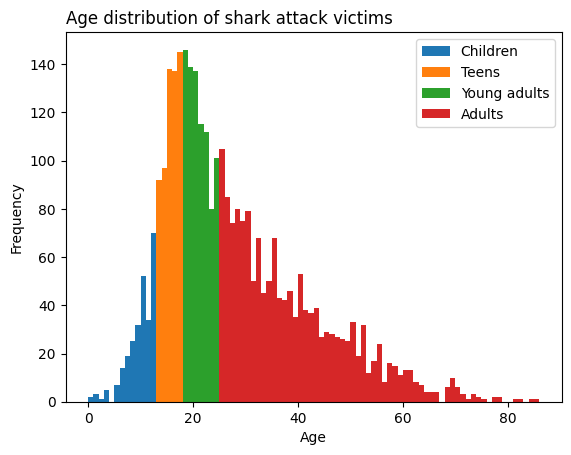

In [32]:
# figure
fig, ax = plt.subplots(1, 1)
ax.set_xlabel('Age')
ax.set_ylabel('Frequency')
ax.hist(ages.loc[ages.between(0,12)], bins=np.arange(min(ages), max(ages)))
ax.hist(ages.loc[ages.between(13,18)], bins=np.arange(min(ages), max(ages)))
ax.hist(ages.loc[ages.between(18,25)], bins=np.arange(min(ages), max(ages)))
ax.hist(ages.loc[ages.between(25,max(ages))], bins=np.arange(min(ages), max(ages)))
ax.set_title("Age distribution of shark attack victims", loc="left")
plt.legend(('Children', 'Teens',"Young adults","Adults"), loc='upper right')


## Species

In [ ]:
# SPECIES
df2["species"].loc[df2["species"].isna()] = None
df2["species"].loc[df2["species"].str.contains('invalid', na=False)] = None # invalid to NA

# filtering out questionable species
df2["species"].loc[df2["species"].str.contains('questionable', na=False)] = None # questionable species to NA
df2["species"].loc[df2["species"].str.contains("\?", na=False)] = None # questionable species to NA
df2["species"].loc[df2["species"].str.contains('possibly', na=False)] = None # "possibly" to NA
df2["species"].loc[df2["species"].str.contains(' or ', na=False)] = None # "or" to NA

df2["species"].loc[df2["species"].str.contains("blue pointer", na=False)] = "mako shark" # blue pointer is australian for mako shark
df2["species"].loc[~((df2["species"].str.contains('shark', na=False)) | df2["species"].isna())] = None # cases with no species to NA

# fixing patterns, doing stuff, to safe data
df2["species"].loc[df2["species"].str.contains(",", na=False)] = df2["species"].loc[df2["species"].str.contains(",", na=False)].str.split(",", n=1, expand=True)[0] # filtering excess info
df2["species"] = df2["species"].str.replace(r'[^a-z\s]', '') # remove all none word-characters
df2["species"] = df2["species"].str.replace(r'\b(\w{1,2})\b', '') # remove all "words" with 1 or 2 characters (kg, m, to)
df2["species"] = df2["species"].str.strip() # stripping whitespace
df2["species"] = df2["species"].str.replace(r"\s{2,}", " ") # replacing multiple whitespaces with only one whitespace
df2["species"] = df2["species"].str.replace("sharks", "shark") # changing sharks to shark
df2["species"] = df2["species"].str.replace("small ", "") # removing "small"
df2["species"] = df2["species"].str.replace("large ", "") # removing "large"
df2["species"] = df2["species"].str.replace("juvenile ", "") # removing "juvenile"
df2["species"].loc[df2["species"].str.contains("shark ", na=False)] = df2["species"].loc[df2["species"].str.contains("shark ", na=False)].str.replace("shark\s.*", "shark") # remove all info after "shark"
df2["species"].loc[df2["species"].str.contains(" involve", na=False)] = df2["species"].loc[df2["species"].str.contains(" involve", na=False)].str.replace(".*involve ", "") # remove said to involve, thought to involve

# bronze whaler shark is the same as whaler and copper shark
df2["species"] = df2["species"].str.replace("copper shark", "bronze whaler shark")
df2["species"].loc[df2["species"].str.match("whaler shark", na=False)] = "bronze whaler shark"

# bull shark is the same as zambesi shark
df2["species"] = df2["species"].str.replace("zambesi shark", "bull shark")

# grey nurse shark is the same as sand tiger shark and raggedtooth shark
df2["species"] = df2["species"].str.replace("sandtiger shark", "grey nurse shark")
df2["species"] = df2["species"].str.replace("raggedtooth shark", "grey nurse shark")


df2["species"].loc[df2["species"].str.match("shark", na=False)] = None # no species to NA


In [34]:
# selecting species with 10 or more observations
counts_species = df2['species'].value_counts().reset_index()
counts_species = counts_species.drop(labels=12, axis=0) # drop weird empty row
df_counts_species = counts_species.loc[counts_species["species"]>9]
df_counts_species.columns = ["species","frequency"]

mask = counts_species["index"].loc[counts_species["species"]>9]
df_species = df2[df2["species"].isin(mask)] # df for species with more than 10 observations

# fatality counts
df_species_2 = df_species.loc[~df_species["fatal"].isna()] # selecting instances with non-missing fatality
counts_species_2 = pd.DataFrame(df_species_2.groupby("species")["fatal"].value_counts()) # value counts of fatality per speies
counts_species_2.columns = ["fatality"]
counts_species_2 = counts_species_2.reset_index()
pivot = counts_species_2.pivot(index='species', columns='fatal', values='fatality').reset_index()

# merging
df_counts_species = df_counts_species.merge(pivot, on="species", how="inner")
df_counts_species["y"] = df_counts_species["y"].fillna(value=0)
df_counts_species["y_pct"] = ((df_counts_species["y"]/(df_counts_species["y"]+df_counts_species["n"]))*100).round()

<ipython-input-143-6fd6419ec912>:4: FutureWarning: The default value of regex will change from True to False in a future version.
  labels = labels.str.replace(r"\.0", "%")


Text(0.0, 1.0, 'Shark species that attacked most frequently')

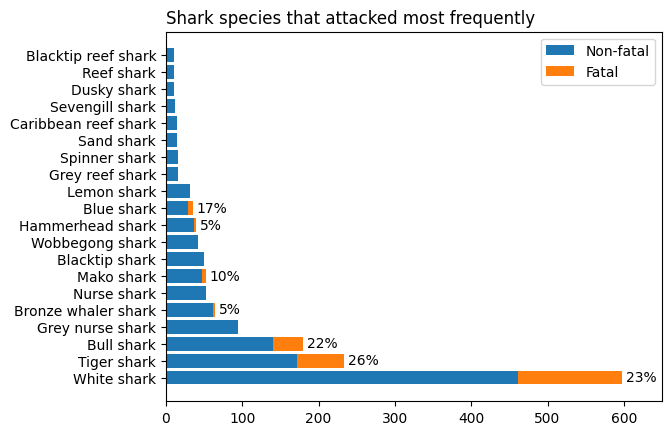

In [143]:
# labels for figure
labels = df_counts_species["y_pct"].astype(str)
labels.loc[labels.str.match("0.0")] = ""
labels = labels.str.replace(r"\.0", "%")

species_x = list(df_counts_species["species"].str.capitalize())
nf = list(df_counts_species["n"])
f = list(df_counts_species["y"])

fig, ax = plt.subplots()
p1 = ax.barh(species_x, nf)
p2 = ax.barh(species_x, f, left=nf)
ax.set_xlim(right=650)
ax.legend(labels=("Non-fatal","Fatal"))
ax.bar_label(p2, labels=labels, padding=3)
ax.set_title("Shark species that attacked most frequently", loc="left")

## Activity

In [ ]:
# ACTIVITY
df2["act"].loc[df2["act"].isna()] = None
df2["act"] = df2["act"].str.replace(r"\s\([\s\S]*\)", "") # removing excess info between ()
df2["act"] = df2["act"].str.replace(r",[\s\S]*", "") # removing excess info after ,

# diving
df2["act"] = df2["act"].str.replace("free diving", "freediving") # changing free diving to freediving
df2["act"] = df2["act"].str.replace("diving for [\s\S]*", "diving for goods") # changing all "diving for" specific things to "diving for goods"
df2["act"] = df2["act"].str.replace("pearl diving", "diving for goods") # changing all "diving for" specific things to "diving for goods"
df2["act"] = df2["act"].str.replace("sponge diving", "diving for goods") # changing all "diving for" specific things to "diving for goods"

# fishing
df2["act"] = df2["act"].str.replace(r"fishing for[\s\S]*shark[s*]", "shark fishing") # replacing fishing for any shark to "shark fishing"
df2["act"] = df2["act"].str.replace(r"fishing for[\s\S]*", "fishing") # replacing remaining "fishing for" to "fishing"

df2["act"] = df2["act"].str.strip()
df2["act"] = df2["act"].str.replace("surf-skiing", "surf skiing") # fixing surf-skiing

# multiple activities listed
df2["act"].loc[df2["act"].str.contains(" / ", na=False)] = df2["act"].loc[df2["act"].str.contains(" / ", na=False)].str.split(" /", expand=True)[0] # for instances with multiple activities, selecting the first mentioned before "/"


In [137]:
# selecting act with more than 25 observations
counts_act = df2["act"].value_counts().reset_index()
mask = counts_act["index"].loc[counts_act["act"]>25]
df_counts_act = counts_act.loc[counts_act["act"]>25]
df_act = df2[df2["act"].isin(mask)]

In [ ]:
# figure
fig, ax = plt.subplots(1, 1)
ax.set_xlabel('Frequency')
ax.barh(np.arange(len(df_counts_act["index"])), list(df_counts_act["act"]), align='center')
ax.set_yticks(np.arange(len(df_counts_act["index"])))
ax.set_yticklabels(list(df_counts_act["index"].str.capitalize()))
ax.set_title("Activities that most frequently resulted in shark attacks", loc="left")

# **Results**

Overall, the available data was very messy. Each variable contained alot of values that had vague descriptions, excess information, errors, etc. I used many different strategies to conserve as much of the data as possible and have a dataset that was as large as possible, in order to answer the questions to the best of my abilities. I decided not to use imputation, as there were no clear cut relationships between variables that would justify that (as there would be with, for example, height and weight).

**All.** First, I selected the relevant variables and removed any observations that had no data on any of these variables, as well as observations for which it was specifically stated that there was no (confirmed) shark involvement.

**Fatality.** To determine how dangerous an attack was, I used the fatality variable as an indicator. There were not many unique values, so it was easy to extract "y" for yes, "n" for no, and set all the other values to "None" (the prefered missing value for string variables).

**Type.** For the type of incident (provoked vs. unprovoked), there were some unique values besides provoked and unprovoked (boating, sea disaster, questionable). As these unique values could not be clearly classified as either provoked/unprovoked, and there were no spelling errors in the provoked/unprovoked values, I just set everything besides provoked/unprovoked to "None".

**Age**. Age was a messy variable with a mix of string entries and number entries, specific ages and age ranges, individual ages and the ages of multiple victims. For the string entries that gave an age range (such as teen or 30s), I used the relevant range and number of observations for that range to create ages evenly spaced out in that range and used those in place of the string entry. For entries that had multiple possible ages or an age range, I used the mean of those. For entries that contained the ages of multiple victims, I expanded the entry into multiple entries to conserve every different age. For some very specific cases, I manually replaced the values. This left me with a dataset containing only number entries, which could be set to integers. For the missing values, I used np.nan.

**Species.** This variable was very messy, containing alot of excess information, many descriptions that were either very specific or vague, errors and such, so I used alot of string manipulations to conserve as much data as possible. I set entries that were invalid or questionable (for example containing multiple possible species, or words indicating uncertainty such as possibly) to missing. I used different string manipulation strategies to remove excess information (for example about size, color, age) and extract only the specific species name from the string. I kept track of the value counts and unique values to see the most common patterns and whether I was able to effectively group entries together. For some species, different names were used to describe the same species, so I manually set those to the most common name. After all this, I had been able to group many of the entries together into specific species and selected the most common based on a value count larger than 9.

**Activity.** Again, a messy variable with excess information and descriptions, resulting in some string manipulation. I removed excess information and kept track of the value counts and unique values to see the most common patterns and whether I was able to effectively group entries together. There were many entries describing very specific things people were diving for (pearls, clams, coins), so I grouped these together into "diving for goods". There were also many entries describing the specific fish people were fishing for, so I decided to remove the specific fish, with the exception of "fishing for sharks". Specifically fishing for sharks seemed too relevant to not classify as a specific activity. For entries with multiple activites listed, I decided to just select the first one listed. I considered manually selecting the "most active" activity, but thought that that might introduce some bias. Again, I had been able to group many of the entries together into specific activities and selected the most common based on a value count larger than 25.

**Q1. What are the most dangerous types of sharks to humans?**

As can be seen in the figure below, the white shark is the shark species that is most frequently involved in shark attacks, with a high percentage of attacks resulting in fatality. While less frequently involved in attacks than white sharks, tiger sharks and bull sharks are still notably more dangerous than the other species, in both frequency and fatality.  

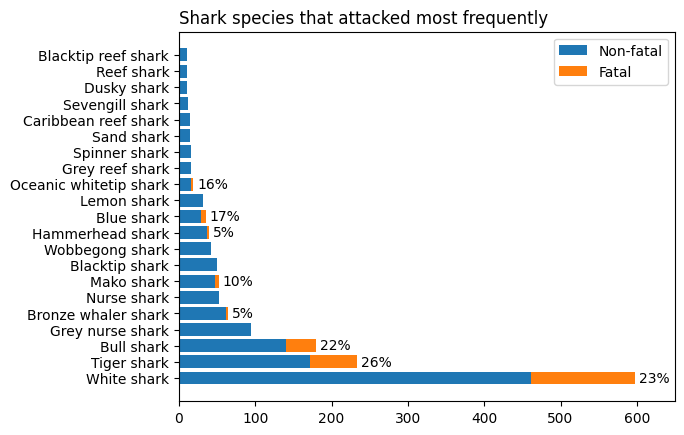

**Q2. Are children more likely to be attacked by sharks?**
In the figure below, the distribution of the ages of shark attack victims can be seen. The age groups that are most likely to be involved in an attack are teens and young adults, with most victims being around 18 years of age. As such, I would not say that children are more likely to be attacked by sharks.   

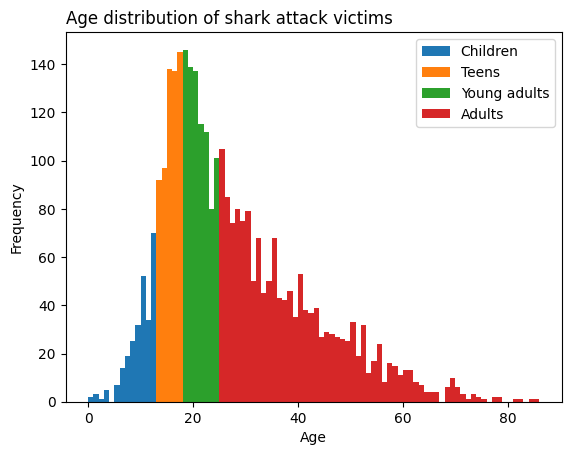

**Q3. Are shark attacks where sharks were provoked more or less dangerous?**
Based on the percentage of incidents that were fatal, I would conclude that provoked shark attacks were less dangerous than unprovoked shark attacks.

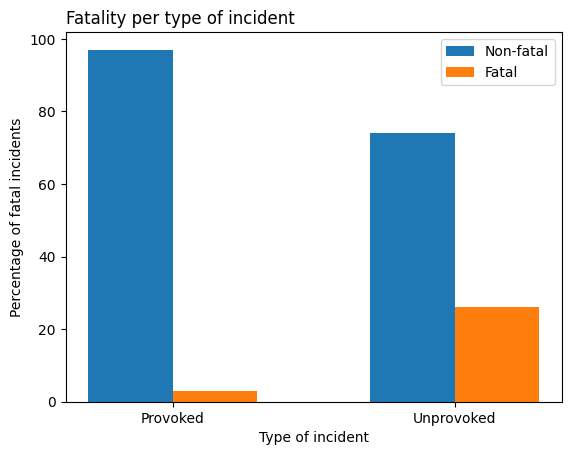

**Q4. Are certain activities more likely to result in a shark attack?**
The figure below shows the activities that were most often involved in shark attacks. Surfing, swimming and (spear)fishing were by far the most frequent activities and in such the activities that are more likely to result in a shark attack. This is not too surprising, as these are likely to be the most common activities that are conducted in water at depths in which sharks can be encountered.

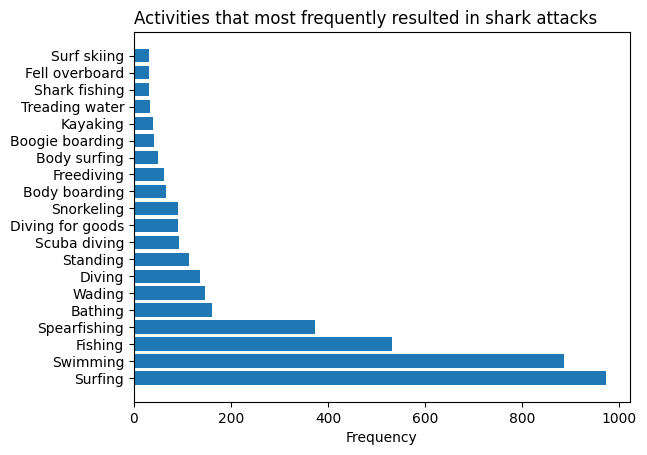